# Insurance Data Analysis

# IMPORTING THE LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the data set 

In [4]:
df=pd.read_csv(r"C:\Users\vanda\OneDrive\Desktop\PySpider\project1\insurance.csv")

UNDERSTAND EACH COLUMN

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

| **Column** | **Description**                          |
| ---------- | ---------------------------------------- |
| `age`      | Age of the individual                    |
| `sex`      | Gender                                   |
| `bmi`      | Body Mass Index                          |
| `children` | Number of dependents                     |
| `smoker`   | Smoker status (`yes` or `no`)            |
| `region`   | Region in the US                         |
| `charges`  | Medical insurance cost (target variable) |


GET THE INFORMATION OF COLUMNS AND NOTE THE OBSERVATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


OBSERVATION:

missing data: There is no missing data

datatype:all the data types are in correct form

understand the data inside the dataframe using head()

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data cleaning

1. check and remove duplicates

In [8]:
df.duplicated().any()

np.True_

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


2. Remove duplicates

In [11]:
df = df.drop_duplicates()



OBSERVATION

Now there is no duplicate data 

3. Handle the missing values

In [12]:
df.shape

(1337, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

OBSERVATION

There is no null values

# DATA TRANSFORMATION

1. Capitalize First Letter of Column Names

In [14]:
df.columns = df.columns.str.title()


In [15]:
df.columns

Index(['Age', 'Sex', 'Bmi', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

2. Round off the values of Bmi and Charges columns to 2 decimal places

In [16]:
df['Bmi'] = df['Bmi'].round(2)
df['Charges'] = df['Charges'].round(2)


In [17]:
df.head()

,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


3. Converts all values in the Smoker column to title case

In [18]:
df['Smoker'] = df['Smoker'].str.title()


In [19]:
df.head()

,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.90,0,Yes,southwest,16884.92
1,18,male,33.77,1,No,southeast,1725.55
2,28,male,33.00,3,No,southeast,4449.46
3,33,male,22.70,0,No,northwest,21984.47
4,32,male,28.88,0,No,northwest,3866.86


# Data Analysis

1. How many male and female individuals are present in the dataset?

In [20]:
df['Sex'].value_counts()


Sex
male      675
female    662
Name: count, dtype: int64

2. How many people in the dataset are smokers and non-smokers?

In [21]:
df['Smoker'].value_counts()


Smoker
No     1063
Yes     274
Name: count, dtype: int64

3. What is the distribution of people across different regions?

In [22]:
df['Region'].value_counts()


Region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

4. What is the average insurance charge for smokers vs non-smokers?

In [23]:
df.groupby('Smoker')['Charges'].mean()


Smoker
No      8440.660310
Yes    32050.231898
Name: Charges, dtype: float64

5. Do males or females pay higher average insurance charges?

In [24]:
df.groupby('Sex')['Charges'].mean()


Sex
female    12569.578716
male      13974.999022
Name: Charges, dtype: float64

6. What is the trend in average insurance charges with respect to the number of children?

In [25]:
df.groupby('Children')['Charges'].mean()


Children
0    12384.695358
1    12731.171728
2    15073.563833
3    15355.318408
4    13850.656800
5     8786.035556
Name: Charges, dtype: float64

7. What is the correlation between Age, BMI, and Charges?

In [26]:
df[['Age', 'Bmi', 'Charges']].corr()


,Age,Bmi,Charges
Age,1.000000,0.109347,0.298308
Bmi,0.109347,1.000000,0.198391
Charges,0.298308,0.198391,1.000000


8. Which individuals have the highest insurance charges?

In [27]:
df.sort_values(by='Charges', ascending=False).head()


,Age,Sex,Bmi,Children,Smoker,Region,Charges
543,54,female,47.41,0,Yes,southeast,63770.43
1300,45,male,30.36,0,Yes,southeast,62592.87
1230,52,male,34.48,3,Yes,northwest,60021.40
577,31,female,38.10,1,Yes,northeast,58571.07
819,33,female,35.53,0,Yes,northwest,55135.40


9. What is the average insurance charge for individuals over 50 years old?

In [28]:
df[df['Age'] > 50]['Charges'].mean()


np.float64(18084.987219101127)

10. What is the average age of individuals in the dataset?

In [29]:
df['Age'].mean()


np.float64(39.222139117427076)

# Data Visualization

1. Display the count of smokers and non-smokers in the dataset 

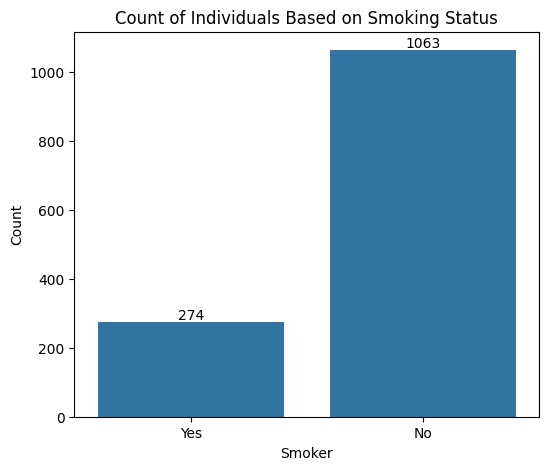

In [30]:
plt.figure(figsize=(6, 5))
c = sns.countplot(data=df, x='Smoker')
c.bar_label(c.containers[0])
plt.title('Count of Individuals Based on Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

OBSERVATION

---> The plot clearly shows that the number of non-smokers is much higher than the number of smokers in the  dataset.

---> This means that most individuals in the dataset do not smoke, while only a smaller portion are smokers.

2. Visualize the frequency distribution of ages.

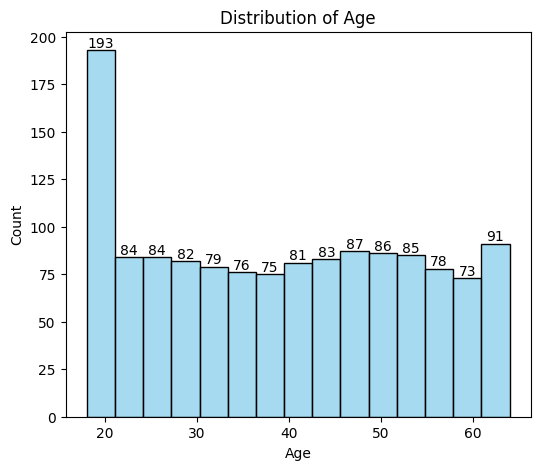

In [31]:
plt.figure(figsize=(6, 5))
h = sns.histplot(data=df, x='Age', bins=15, kde=False, color='skyblue')
h.bar_label(h.containers[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


OBSERVATION

---> The x-axis shows the age of individuals.

---> The y-axis shows how many people fall into each age group.

--> Most people in the dataset are between 20 and 60 years old.

---> The age group with the highest number of individuals is around the 20s to early 30s.

---> Very few people are below 20 or above 60.

3.  Plot the smooth distribution curve for the BMI column 

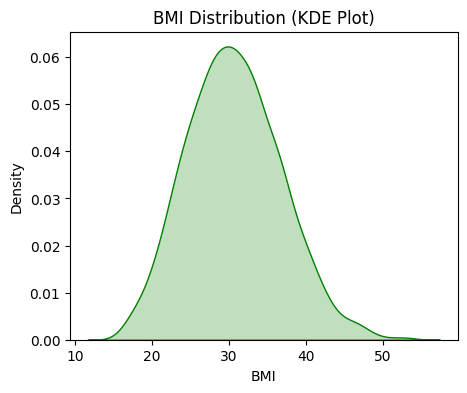

In [32]:
plt.figure(figsize=(5, 4))
sns.kdeplot(data=df, x='Bmi', fill=True, color='green')
plt.title('BMI Distribution (KDE Plot)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


OBSERVATION

---> The KDE plot shows a smooth curve of how BMI values are distributed.

---> Most people have a BMI between 25 and 35.

---> The peak of the curve is around 30, which means many individuals have a BMI close to that.

---> There are very few individuals with a BMI below 20 or above 40.

4. Display the proportion of individuals across different regions

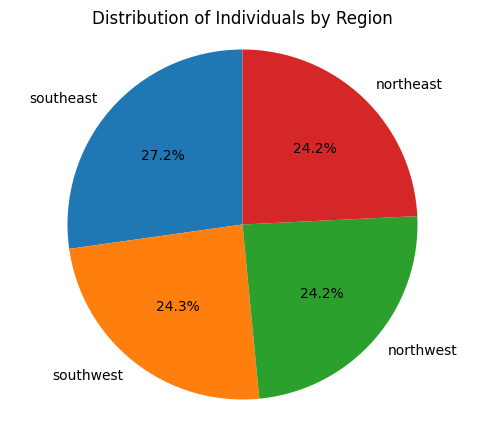

In [35]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(6, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Individuals by Region')
plt.axis('equal')
plt.show()




OBSERVATION

---> The pie chart shows the percentage of individuals from each region.

---> The distribution is fairly balanced among the four regions.

---> The Southeast region has the highest number of individuals.

---> The Northwest and Southwest regions have similar proportions.

---> All regions are represented, so regional comparisons are valid.

5. Compare the average insurance charges between smokers and non-smokers 

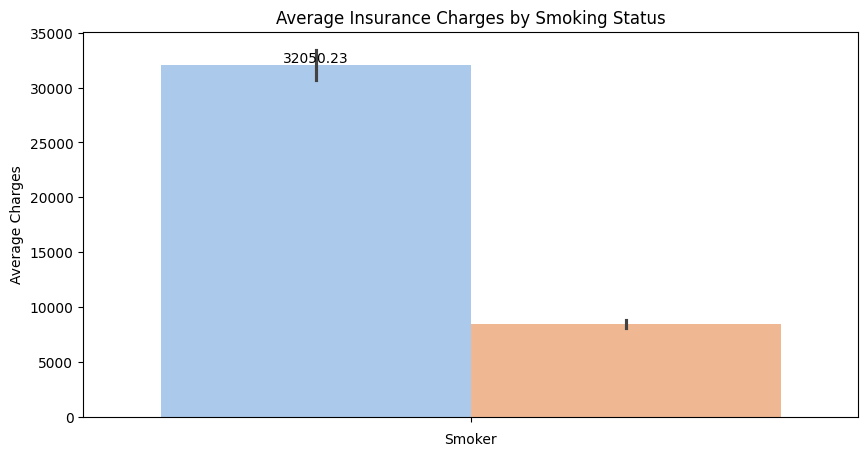

In [38]:
plt.figure(figsize=(10, 5))
bar = sns.barplot(data=df, hue='Smoker', y='Charges', estimator='mean', palette='pastel',legend=False)
bar.bar_label(bar.containers[0], fmt='%.2f')
plt.title('Average Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()


OBSERVATION

---> The barplot clearly shows that smokers have higher  insurance charges than non-smokers.

---> This indicates a strong positive relationship between smoking and higher medical costs.

---> The difference is visually significant and supports the idea that smoking is a key factor in insurance pricing.

6. Visualize the trend of average insurance charges with increasing age

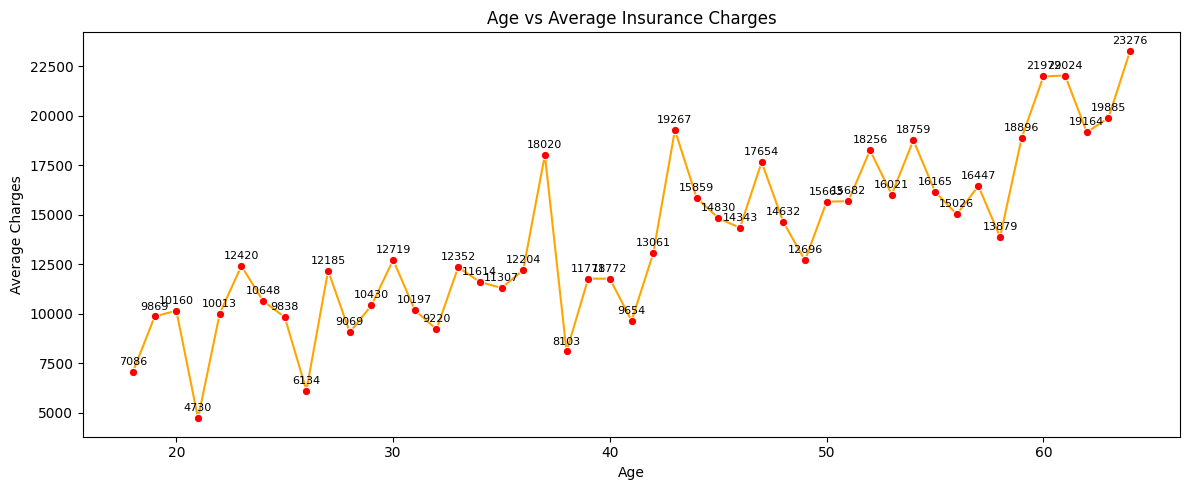

In [52]:
# age_charges = df.groupby('Age')['Charges'].mean().reset_index()

# plt.figure(figsize=(12, 5))
# line = sns.lineplot(data=age_charges, x='Age', y='Charges', color='orange',markers='o')
# plt.title('Age vs Average Insurance Charges')
# plt.xlabel('Age')
# plt.ylabel('Average Charges')
# plt.show()


age_charges = df.groupby('Age')['Charges'].mean().reset_index()

plt.figure(figsize=(12, 5))

# Lineplot with marker style
line = sns.lineplot(data=age_charges, x='Age', y='Charges', color='orange', marker='o',markerfacecolor='red')

# Add point labels
for x, y in zip(age_charges['Age'], age_charges['Charges']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.title('Age vs Average Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()



OBSERVATION

---> The lineplot shows that insurance charges generally increase with age.

---> Charges remain moderate in early adulthood and begin to rise more sharply after age 40.

---> This trend reflects how age is a significant factor in determining insurance costs, likely due to increased health risks over time.

7. Visualize the relationship between BMI and insurance charges, grouped by smoking status

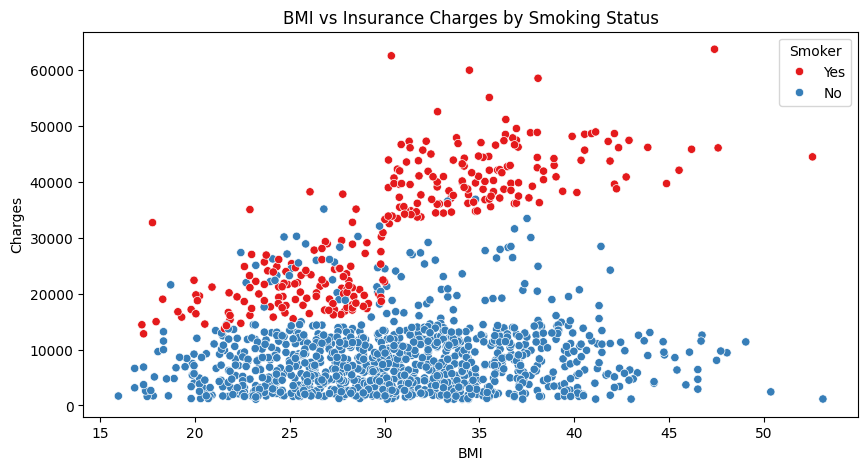

In [44]:
plt.figure(figsize=(10, 5))
scatter = sns.scatterplot(data=df, x='Bmi', y='Charges', hue='Smoker', palette='Set1')
plt.title('BMI vs Insurance Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


OBSERVATION

---> The scatterplot shows a positive relationship between BMI and insurance charges, especially for smokers.

---> Smokers with high BMI tend to have the highest insurance charges in the dataset.

---> Non-smokers show a flatter spread, suggesting smoking has a stronger impact on charges than BMI alone.

8. Analyze the distribution and outliers of insurance charges across different regions

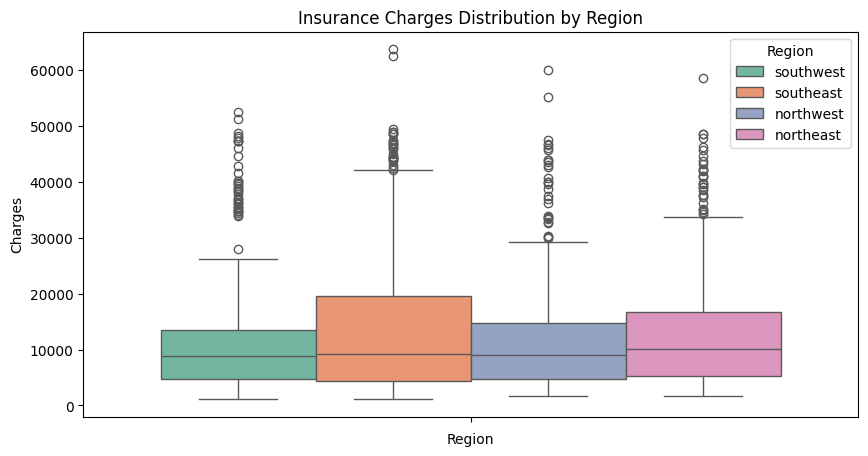

In [46]:
plt.figure(figsize=(10, 5))
box = sns.boxplot(data=df, hue='Region', y='Charges', palette='Set2')
plt.title('Insurance Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


OBSERVATIO

---> All regions have similar median charges, indicating a relatively uniform pricing structure.

---> Southeast and Southwest regions show wider interquartile ranges, suggesting more variation in charges.

---> Outliers are present in all regions, with some individuals having very high insurance charges, especially in the Southeast.

9. Visualize the correlation between numeric features in the dataset

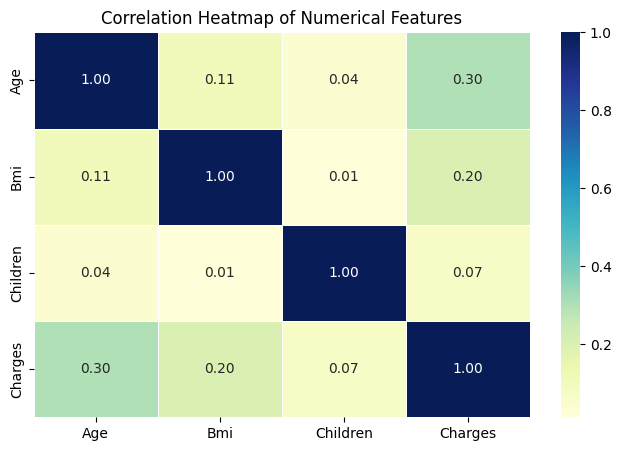

In [47]:


# Selecting only numeric columns
numeric_cols = df[['Age', 'Bmi', 'Children', 'Charges']]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


OBSERVATION

---> There is a strong positive correlation between Age and Charges, meaning insurance costs increase with age.

---> Bmi has a moderate correlation with Charges, indicating some influence.

---> Children shows a very weak correlation with Charges, suggesting the number of children has little effect on cost.

---> The heatmap gives a quick visual summary of how each numeric feature relates to charges.

# CONCLUSION

---> This project provided a clear understanding of how factors like age, BMI, and smoking status affect insurance charges. 

---> The analysis showed that smokers pay significantly higher charges compared to non-smokers, and charges increase steadily with age, especially after 40. 

---> Most individuals in the dataset are non-smokers and aged between 20 and 60. The data was clean and well-structured, and visualizations helped reveal important patterns. 

---> Overall, the project successfully highlighted the key factors influencing insurance costs in a  way that is easy to understand and explain.